### METAHEURISTICS EXAM DSTI A19
#### Jean MILPIED
#### date: May 26

### F1: Shifted sphere function

The shifted sphere function is:  
sum for i = 1 to D of z**2 + a bias, where z=x-O (O is the D dimensional shift) and x=[x1,x2,...,xD]

In [1]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import uniform
import math
import time

In [2]:
#objective function
def objective_F1(my_x):
    my_J=sum((my_x-my_shift)**2)-450 #there is a bias (-450 is given in publication)
    return my_J

In [3]:
#initialize function
def initialize_my_X (D,range_min, range_max):
    my_X_init=np.random.uniform(low=range_min, high=range_max, size=D)
    return my_X_init

In [4]:
global my_obj #we create a global variable to consolidate the evolution of the objective function
#call-back function for the optimizer
def costF(Xi):
    my_obj.append(objective_F1(Xi))

In [21]:
my_obj=[]

def problem(my_size, my_func,my_bound_min,my_bound_max):
    global my_shift
    my_X0_2=initialize_my_X(my_size,my_bound_min,my_bound_max)
    my_shift=initialize_my_X(my_size,my_bound_min,my_bound_max) #we initialize the shift at random (this can be changed)
    t1=time.time()
    res = minimize(my_func, my_X0_2, bounds=(my_bound_min,my_bound_max),method='BFGS',tol=1e-5,options={'gtol': 1e-6, 'maxiter':1000,'disp': True}, callback=costF)
    t2=time.time()
    plt.plot(np.array(my_obj)+450)
    plt.xlabel("iterations")
    plt.ylabel("fitness")
    print("total computational time is ",np.round(t2-t1,4),"  seconds")
    print("optimization results are :", res.x)
    

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 7
         Function evaluations: 728
         Gradient evaluations: 14
total computational time is  0.0174   seconds
optimization results are : [-36.70877137  60.07378089  32.95712738 -49.65439012 -97.33821219
  -2.40795565 -85.50648121  48.17796414  59.59845899  70.49239952
  65.51822791 -58.19733504 -86.95028231  84.00489592 -21.92295122
 -96.37472353 -95.71646986  41.99548266  62.34988992  47.36990526
 -34.3465316   42.55062169  38.99090974  99.30227108 -37.06322132
  80.20843354 -44.74055665 -16.89051245 -88.01798781  76.47571524
  91.29812875 -65.14040455   8.42602152   0.76081537  62.53839864
  92.52915777  -0.57786987  55.48308861  21.32858799 -82.08420785
  77.03914248  65.09008733  42.72289649 -53.78366377 -43.2485458
  62.43347307 -49.15340119  56.78517404 -94.00564433 -69.63517001]


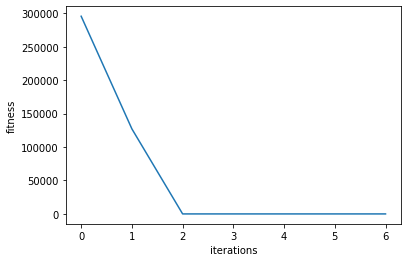

In [22]:
problem(50,objective_F1,-100,100)

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 31
         Function evaluations: 27108
         Gradient evaluations: 54
total computational time is  2.1819   seconds
optimization results are : [-78.25646998  87.87338111 -75.31487048  96.39885821 -53.47189805
  33.31732542  69.11956525   4.73604989   8.4319542  -82.34462623
 -44.97539513  36.45615671  85.47630011  87.23812259 -33.68535572
 -94.03429521  41.04178911  55.393797   -84.72906205 -30.43738628
 -71.57018631 -79.46052946  18.52705591  12.35020875 -98.13839642
  16.91204264  62.29765663 -10.45128285 -43.11358427 -79.94149177
  16.7855729   13.47239577 -82.55866419  13.90807428 -14.32440882
 -13.52549115  77.58812371  12.52165873 -67.80999615  65.75479294
  57.64002818  17.87676247 -97.75343267  75.06321102  21.09458341
  92.9074603  -56.45801393 -98.01505547   9.44101942  26.59544795
  75.30601214  86.71274116 -43.70534902  83.94734094 -63.4597319
  68.37796421 -51.931127

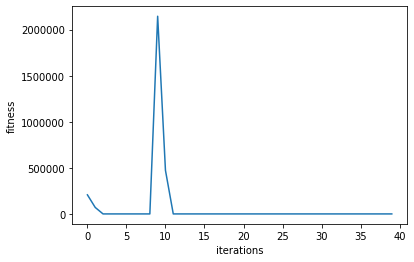

In [20]:
problem(500,objective_F1,-100,100)